In [60]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### CHAMPIONS 2014-2015

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=0,
                    batch_size=32, validation_data=(X_test, y_test))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=90,
                    batch_size=32, validation_data=(X_test, y_test))

Epoch 1/90


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6058 - loss: 0.8189 - val_accuracy: 0.4074 - val_loss: 0.6886
Epoch 2/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2899 - loss: 0.6776 - val_accuracy: 0.2593 - val_loss: 0.6429
Epoch 3/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2682 - loss: 0.6778 - val_accuracy: 0.2222 - val_loss: 0.6271
Epoch 4/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1617 - loss: 0.6266 - val_accuracy: 0.2593 - val_loss: 0.6087
Epoch 5/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2169 - loss: 0.6715 - val_accuracy: 0.3333 - val_loss: 0.5786
Epoch 6/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3128 - loss: 0.6122 - val_accuracy: 0.2963 - val_loss: 0.5760
Epoch 7/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3333 - loss: 0.6316 - val_accuracy: 0.3333 - val_loss: 0.5757
Epoch 8/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1865 - loss: 0.5964 - val_accuracy: 0.2963 - val_loss: 0.5665
Epoch 9/90


In [62]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Pérdida en datos de prueba:", loss)
print("Precisión en datos de prueba:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5185 - loss: 0.2470
Pérdida en datos de prueba: 0.2469514161348343
Precisión en datos de prueba: 0.5185185074806213


In [63]:
def predict_match_result(home_team, away_team):
    home_team_encoded = label_encoder.transform([home_team])
    away_team_encoded = label_encoder.transform([away_team])
    match_data = pd.DataFrame(
        {'Home Team': home_team_encoded, 'Away Team': away_team_encoded})
    match_data = match_data.values.reshape(1, -1)
    result_probability = model.predict(match_data)
    return result_probability[0][0]

In [64]:
# Definir una función para determinar al ganador de un partido
def determinar_ganador(home_team, away_team, home_goals, away_goals):
    if home_goals > away_goals:
        return home_team
    elif away_goals > home_goals:
        return away_team
    else:
        return "Empate"


# Iterar sobre cada partido y predecir el resultado
df = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

for index, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    home_goals = row['Home Goals']
    away_goals = row['Away Goals']

    # Calcular la probabilidad de que gane el equipo local
    prob_local = predict_match_result(home_team, away_team)

    # Calcular la probabilidad de que gane el equipo visitante
    prob_visitante = 1 - prob_local

    # Determinar al ganador del partido
    ganador = determinar_ganador(home_team, away_team, home_goals, away_goals)

    print(f"Partido: {home_team} vs {away_team}")
    print(f"Probabilidad de que gane {home_team}: {prob_local:.2%}")
    print(f"Probabilidad de que gane {away_team}: {prob_visitante:.2%}")
    print(f"Ganador: {ganador}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Partido: Real Madrid vs FC Basel
Probabilidad de que gane Real Madrid: 13.59%
Probabilidad de que gane FC Basel: 86.41%
Ganador: Real Madrid

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Partido: Liverpool vs Ludogorets Razgrad
Probabilidad de que gane Liverpool: 41.24%
Probabilidad de que gane Ludogorets Razgrad: 58.76%
Ganador: Liverpool

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Partido: Benfica vs FC Zenit
Probabilidad de que gane Benfica: 59.13%
Probabilidad de que gane FC Zenit: 40.87%
Ganador: FC Zenit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Partido: AS Monaco vs Bayer Leverkusen
Probabilidad de que gane AS Monaco: 2.83%
Probabilidad de que gane Bayer Leverkusen: 97.17%
Ganador: AS Monaco

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Partido: Galatasaray vs Anderlecht
Probabilidad de que gane Galatasaray: 75.26%
Probabilidad de que gane Anderlecht: 24.74%
Ganador: Empate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Partido: Olympiacos vs Atletico de Madrid
Probabili

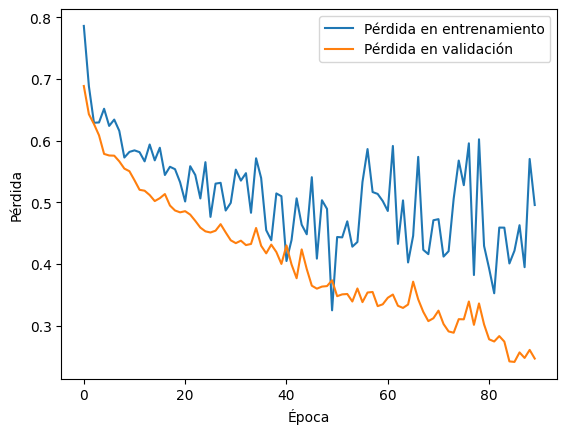

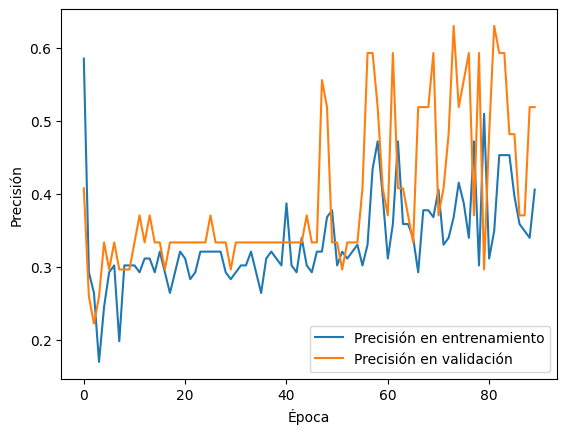

In [65]:

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### CHAMPIONS 2015-2016

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


class ChampionsLeaguePredictor:
    def __init__(self):
        self.model = None
        self.label_encoder = LabelEncoder()

    def load_data(self, file_path):
        data = pd.read_csv(file_path)

        # Codificar los nombres de los equipos
        data['Home Team'] = self.label_encoder.fit_transform(data['Home Team'])
        data['Away Team'] = self.label_encoder.transform(data['Away Team'])

        # Crear una columna para representar el resultado del partido
        data['Result'] = data['Home Goals'] - data['Away Goals']
        data['Result'] = data['Result'].apply(
            lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

        # Dividir los datos en características (X) y variable objetivo (y)
        X = data[['Home Team', 'Away Team']]
        y = data['Result']

        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, X_test, y_test, epochs=100):
        # Definir el modelo de red neuronal
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compilar el modelo
        self.model.compile(optimizer='sgd', loss='binary_crossentropy',
                           metrics=['accuracy'])

        # Entrenar el modelo y guardar el historial del entrenamiento en una variable
        history = self.model.fit(X_train, y_train, epochs=epochs,
                                 batch_size=32, validation_data=(X_test, y_test))

        return history

    def predict_match_result(self, home_team, away_team):
        home_team_encoded = self.label_encoder.transform([home_team])
        away_team_encoded = self.label_encoder.transform([away_team])
        match_data = pd.DataFrame(
            {'Home Team': away_team_encoded, 'Away Team': home_team_encoded})
        match_data = match_data.values.reshape(1, -1)
        result_probability = self.model.predict(match_data)
        return result_probability[0][0]

    def determine_winner(self, home_team, away_team, home_goals, away_goals):
        if home_goals > away_goals:
            return home_team
        elif away_goals > home_goals:
            return away_team
        else:
            return "Empate"


df = pd.read_csv('Datos_Limpios/Champions_Completa.csv')


predictor = ChampionsLeaguePredictor()

X_train, X_test, y_train, y_test = predictor.load_data(
    'Datos_Limpios/Champions_Completa.csv')
history = predictor.train_model(X_train, y_train, X_test, y_test, epochs=100)

Epoch 1/100


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2396 - loss: 0.6129 - val_accuracy: 0.1864 - val_loss: 0.3811
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2253 - loss: 0.5003 - val_accuracy: 0.1864 - val_loss: 0.3835
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1965 - loss: 0.4429 - val_accuracy: 0.1864 - val_loss: 0.3825
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2134 - loss: 0.4391 - val_accuracy: 0.1864 - val_loss: 0.4286
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: 0.4958 - val_accuracy: 0.1864 - val_loss: 0.3872
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1985 - loss: 0.4135 - val_accuracy: 0.1864 - val_loss: 0.3904
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2015 - loss: 0.5198 - val_accuracy: 0.1864 - val_loss: 0.3823
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2114 - loss: 0.5340 - val_accuracy: 0.1864 - val_loss: 0.

In [67]:
# PREDICE EL RESULTADO DE UN PARTIDO

equipo1 = "Real Madrid"
equipo2 = "FC Barcelona"
prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Probabilidad de que gane equipo local Real Madrid: 66.37%
Probabilidad de que gane equipo visitante FC Barcelona: 33.63%


In [68]:

equipo1 = "FC Barcelona"
equipo2 = "Real Madrid"
prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Probabilidad de que gane equipo local FC Barcelona: 23.88%
Probabilidad de que gane equipo visitante Real Madrid: 76.12%


In [ ]:
print("Probabilidad en una final entre Real Madrid y FC Barcelona")
probbilidad1 = (prob_local1 + prob_visitante2) / 2
probbilidad2 = (prob_local2 + prob_visitante1) / 2

print(f"Probabilidad de que gane Real Madrid: {probbilidad1:.2%}")
print(f"Probabilidad de que gane FC Barcelona: {probbilidad2:.2%}")